# Merchant Transaction Analysis to lend loan

.

# Loading and Basic Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
df=pd.read_csv('data.csv')
df.dropna(how='all',inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df.head(2)

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,10-Mar-16,DEPOSIT ID NUMBER xx6836,credit,5000.0,5671.4
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,21-Mar-16,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.0,5687.4


In [3]:
df.shape

(29029, 10)

In [4]:
df.dtypes

Lead ID               int64
bankid                int64
bank_account_id       int64
account_number       object
Industry             object
post_date            object
description          object
transaction_type     object
amount              float64
running_balance     float64
dtype: object

In [5]:
df['bankid'].nunique()

10

In [6]:
df['bank_account_id'].nunique()

53

In [7]:
df['Lead ID'].nunique()

21

In [8]:
df['post_date'][0]

'10-Mar-16'

In [9]:
df['month']=[x.split('-')[1] for x in df['post_date']] #Extracting month for future analysis
df['p_date']=pd.to_datetime(df['post_date']) #Converting to datetime for future analysis

In [10]:
df['Lead ID']=df['Lead ID'].astype('int32')
df['bank_account_id']=df['bank_account_id'].astype('int32')

# Analyzing merchant id, bank id and bank accounts

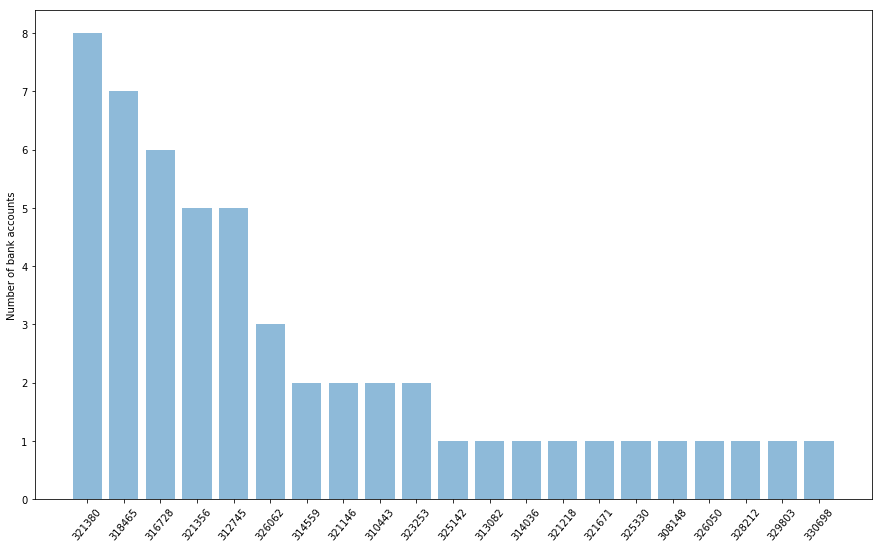

In [11]:
plt.rcParams['figure.figsize']=(15,9)
x=pd.DataFrame(df[['Lead ID','bank_account_id']].groupby('Lead ID')['bank_account_id'].nunique())
x=x.sort_values(by='bank_account_id',ascending=False)
x=x.sort_values(by='bank_account_id',ascending=False)
import numpy as np
y_pos = np.arange(len(x.index))
plt.bar(y_pos, x['bank_account_id'], align='center', alpha=0.5)
plt.xticks(y_pos, x.index,rotation=50)
plt.ylabel('Number of bank accounts')
plt.show() #Shows number of bank accounts per merchant

In [12]:
pd.DataFrame(df[['Lead ID','bank_account_id','month']].groupby(['Lead ID','bank_account_id'])['month'].nunique()).sort_values(by='month', ascending=False).reset_index()

,Lead ID,bank_account_id,month
0,330698,14374,12
1,316728,13228,12
2,321356,15144,12
3,321356,15146,12
4,321380,14634,12
5,321380,14635,12
6,321380,14636,12
7,321380,14637,12
8,316728,13234,12
9,316728,13232,12


In [13]:
df.groupby(['Lead ID','bank_account_id','transaction_type'])['amount'].agg(['count','sum','mean'])

count          sum          mean
Lead ID bank_account_id transaction_type                                  
308148  12460           credit              172     66611.03    387.273430
                        debit               320     61799.63    193.123844
310443  12654           credit               27    308732.78  11434.547407
                        debit               223    328895.38   1474.867175
        12655           credit                8     16400.44   2050.055000
                        debit                23     17766.66    772.463478
312745  12835           credit                7     16054.00   2293.428571
                        debit                11     16054.00   1459.454545
        12836           credit                3     19055.79   6351.930000
                        debit                 5     19035.00   3807.000000
        12837           credit                1        25.00     25.000000
        12838           credit               35     29957.00    855.914286
                        debit                47     29895.62    636.077021
        12839           credit              114    654346.10   5739.878070
                        debit               537    648265.91   1207.199088
313082  13233           credit              112    547025.33   4884.154732
                        debit              1026    558877.28    544.714698
314036  13226           credit              276    445920.11   1615.652572
                        debit              1985    432974.81    218.123330
314559  13271           credit              135    521917.86   3866.058222
                        debit               280    513734.25   1834.765179
        13273           credit                8      5700.06    712.507500
                        debit                 4      6080.00   1520.000000
316728  13228           credit               21     86542.04   4121.049524
                        debit               458     86505.90    188.877511
        13230           credit               85       196.00      2.305882
                        debit                 2       180.00     90.000000
        13232           credit              110   1817750.53  16525.004818
                        debit              1598   1770673.70   1108.056133
        13234           credit               35    423519.17  12100.547714
...                                         ...          ...           ...
321380  14634           debit                54     25519.00    472.574074
        14635           credit               43     25397.00    590.627907
                        debit                52     25433.00    489.096154
        14636           credit             2303   1226645.15    532.629244
                        debit               233   1225003.69   5257.526567
        14637           credit             2047   1234885.00    603.265755
                        debit               348   1239360.25   3561.380029
321671  14629           credit              642    312136.74    486.194299
                        debit              1788    307190.47    171.806751
323253  13877           credit               17     20358.38   1197.551765
                        debit                 7     20112.00   2873.142857
        13879           credit              291    956058.64   3285.424880
                        debit               418    970342.72   2321.394067
325142  14049           credit              115    472617.59   4109.718174
                        debit               876    463603.42    529.227648
325330  15002           credit              312     82662.27    264.943173
                        debit               257     80230.32    312.180233
326050  14206           credit              190    288065.74   1516.135474
                        debit               459    271315.57    591.101460
326062  14044           credit              421    382062.52    907.511924
                        debit               604    390476.77    646

In [14]:
df.groupby(['Lead ID','transaction_type'])['amount'].agg(['count','sum','mean'])

count          sum          mean
Lead ID transaction_type                                  
308148  credit              172     66611.03    387.273430
        debit               320     61799.63    193.123844
310443  credit               35    325133.22   9289.520571
        debit               246    346662.04   1409.195285
312745  credit              160    719437.89   4496.486813
        debit               600    713250.53   1188.750883
313082  credit              112    547025.33   4884.154732
        debit              1026    558877.28    544.714698
314036  credit              276    445920.11   1615.652572
        debit              1985    432974.81    218.123330
314559  credit              143    527617.92   3689.635804
        debit               284    519814.25   1830.331866
316728  credit              298   2463019.63   8265.166544
        debit              2314   2415843.54   1044.011901
318465  credit              369    231848.55    628.315854
        debit              1694    229560.94    135.514132
321146  credit              121    105932.46    875.474876
        debit               454    100592.42    221.569207
321218  credit               57   1444858.49  25348.394561
        debit               849   1466503.18   1727.330012
321356  credit              697   4100523.96   5883.104677
        debit               788   4142484.93   5256.960571
321380  credit             4939   2722093.90    551.142721
        debit               773   2676941.14   3463.054515
321671  credit              642    312136.74    486.194299
        debit              1788    307190.47    171.806751
323253  credit              308    976417.02   3170.185130
        debit               425    990454.72   2330.481694
325142  credit              115    472617.59   4109.718174
        debit               876    463603.42    529.227648
325330  credit              312     82662.27    264.943173
        debit               257     80230.32    312.180233
326050  credit              190    288065.74   1516.135474
        debit               459    271315.57    591.101460
326062  credit              852    841636.71    987.836514
        debit              1443    847077.83    587.025523
328212  credit              282    177402.52    629.086950
        debit               345    174827.66    506.746841
329803  credit              116    219079.29   1888.614569
        debit               655    212387.64    324.255939
330698  credit              346  10940564.93  31620.129855
        debit               906  10929049.32  12062.968344

In [15]:
df.groupby(['Industry','transaction_type'])['amount'].agg(['count','sum','mean'])

count  \
Industry                                         transaction_type          
Accommodation and Food Services                  credit             1214   
                                                 debit              2222   
Agriculture, Forestry, Fishing and Hunting       credit               57   
                                                 debit               849   
Construction                                     credit              449   
                                                 debit              3215   
Educational Services                             credit              282   
                                                 debit               345   
Finance and Insurance                            credit             4939   
                                                 debit               773   
Health Care and Social Assistance                credit              715   
                                                 debit              2600   
Information Technology                           credit              143   
                                                 debit               284   
Other Services (except Public Administration)    credit              812   
                                                 debit              1664   
Professional, Scientific, and Technical Services credit              272   
                                                 debit              1626   
Retail Trade                                     credit             1659   
                                                 debit              4909   

                                                                           sum  \
Industry                                         transaction_type                
Accommodation and Food Services                  credit             1196313.48   
                                                 debit              1180193.03   
Agriculture, Forestry, Fishing and Hunting       credit             1444858.49   
                                                 debit              1466503.18   
Construction                                     credit             3007232.14   
                                                 debit              2974893.22   
Educational Services                             credit              177402.52   
                                                 debit               174827.66   
Finance and Insurance                            credit             2722093.90   
                                                 debit              2676941.14   
Health Care and Social Assistance                credit            11172413.48   
                                                 debit             11158610.26   
Information Technology                           credit              527617.92   
                                                 debit               519814.25   
Other Services (except Public Administration)    credit             4573141.55   
                                                 debit              4606088.35   
Professional, Scientific, and Technical Services credit             1266463.22   
                                                 debit              1272127.81   
Retail Trade                                     credit             1923068.60   
                                                 debit              1911442.74   

                                                                           mean  
Industry                                         transaction_type                
Accommodation and Food Services                  credit              985.431203  
                                                 debit               531.139977  
Agriculture, Forestry, Fishing and Hunting       credit            25348.394561  
                                                 debit              1727.330012  
Construction                                     credit             6697.621693  
               

In [16]:
df.groupby(['bankid','transaction_type'])['amount'].agg(['count','sum','mean'])

count          sum          mean
bankid transaction_type                                  
6192   credit               35    325133.22   9289.520571
       debit               246    346662.04   1409.195285
8534   credit             5441   3772067.37    693.267298
       debit              3311   3739198.97   1129.326176
8535   credit             1649   2324372.47   1409.564870
       debit              4665   2318573.46    497.014675
8544   credit             1437   7233806.93   5033.964461
       debit              3866   7226246.58   1869.179146
8545   credit              654  11916981.95  18221.684939
       debit              1331  11919504.04   8955.299805
9262   credit              369    231848.55    628.315854
       debit              1694    229560.94    135.514132
9966   credit              276    445920.11   1615.652572
       debit              1985    432974.81    218.123330
10479  credit              121    105932.46    875.474876
       debit               454    100592.42    221.569207
10591  credit              503    209683.75    416.866302
       debit                86    161625.20   1879.362791
10656  credit               57   1444858.49  25348.394561
       debit               849   1466503.18   1727.330012

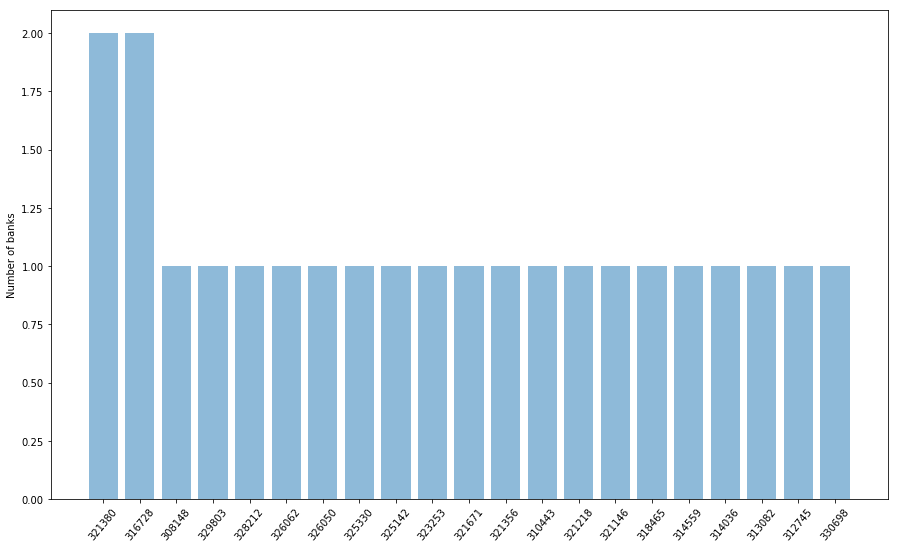

In [17]:
x=pd.DataFrame(df[['Lead ID','bankid']].groupby('Lead ID')['bankid'].nunique())
x=x.sort_values(by='bankid',ascending=False)
import numpy as np
y_pos = np.arange(len(x.index))
plt.bar(y_pos, x['bankid'], align='center', alpha=0.5)
plt.xticks(y_pos, x.index,rotation=50)
plt.ylabel('Number of banks')
plt.show()

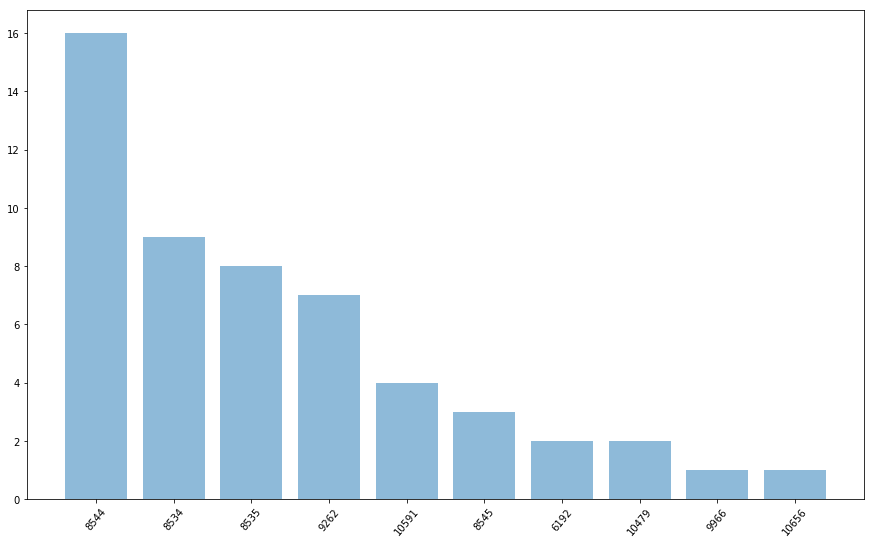

In [18]:
df['bankid']=df['bankid'].astype('int32')
x=pd.DataFrame(df[['bankid','bank_account_id']].groupby('bankid')['bank_account_id'].nunique())
x=x.sort_values(by='bank_account_id',ascending=False)
import numpy as np
y_pos = np.arange(len(x.index))
plt.bar(y_pos, x['bank_account_id'], align='center', alpha=0.5)
plt.xticks(y_pos, x.index,rotation=50)
plt.show()

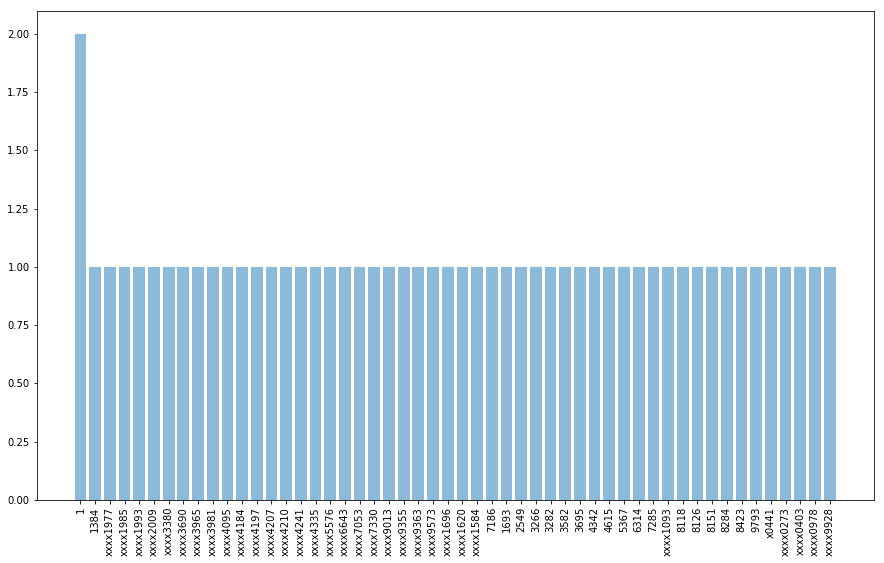

In [19]:
x=pd.DataFrame(df[['account_number','bank_account_id']].groupby('account_number')['bank_account_id'].nunique())
x=x.sort_values(by='bank_account_id',ascending=False)
import numpy as np
y_pos = np.arange(len(x.index))
plt.bar(y_pos, x['bank_account_id'], align='center', alpha=0.5)
plt.xticks(y_pos, x.index,rotation=90)
plt.show()


C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


(array([736055., 736085., 736116., 736146., 736177., 736208., 736238.,
        736269., 736299.]), <a list of 9 Text xticklabel objects>)

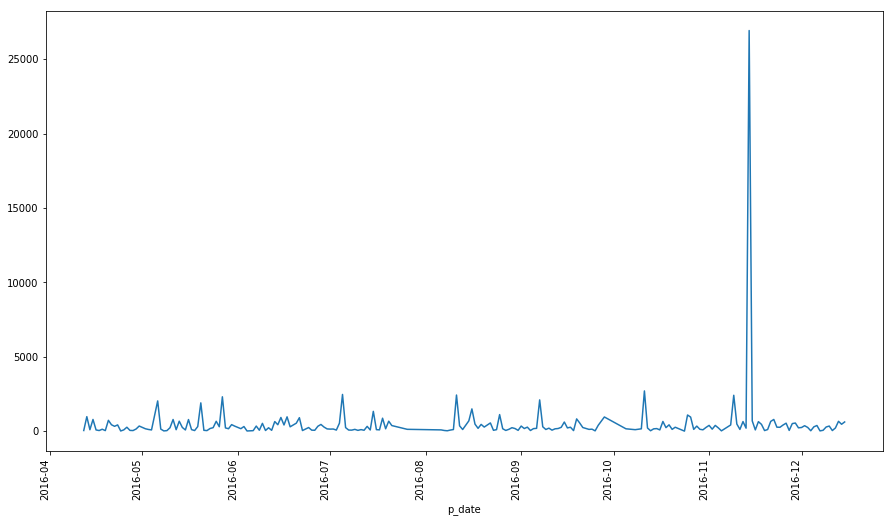

In [20]:
#Analyzing a particular merchant for one bank account
d1=df[np.logical_and(df['Lead ID']==318465 , df['bank_account_id']==13419)]
d1.index=d1['p_date']
a=d1[d1['transaction_type']=='debit'].groupby('p_date')['amount'].sum().plot()
plt.xticks(rotation=90)

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


(array([736055., 736085., 736116., 736146., 736177., 736208., 736238.,
        736269., 736299.]), <a list of 9 Text xticklabel objects>)

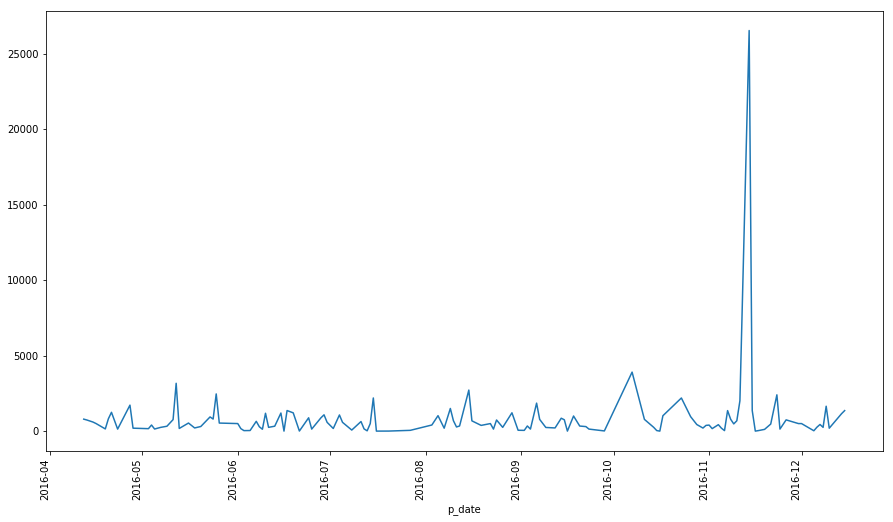

In [21]:
d1[d1['transaction_type']=='credit'].groupby('p_date')['amount'].sum().plot()
plt.xticks(rotation=90)

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


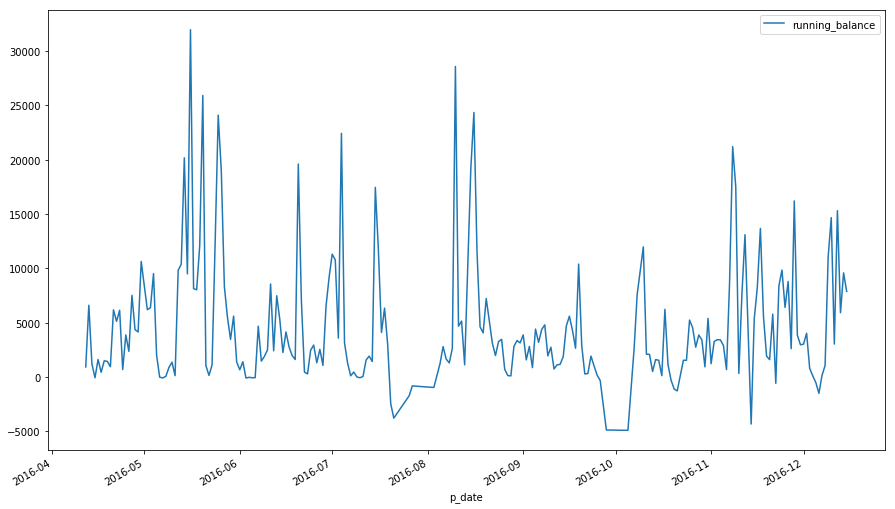

In [22]:
x=pd.DataFrame(d1.groupby('p_date')['running_balance'].sum())
x.plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


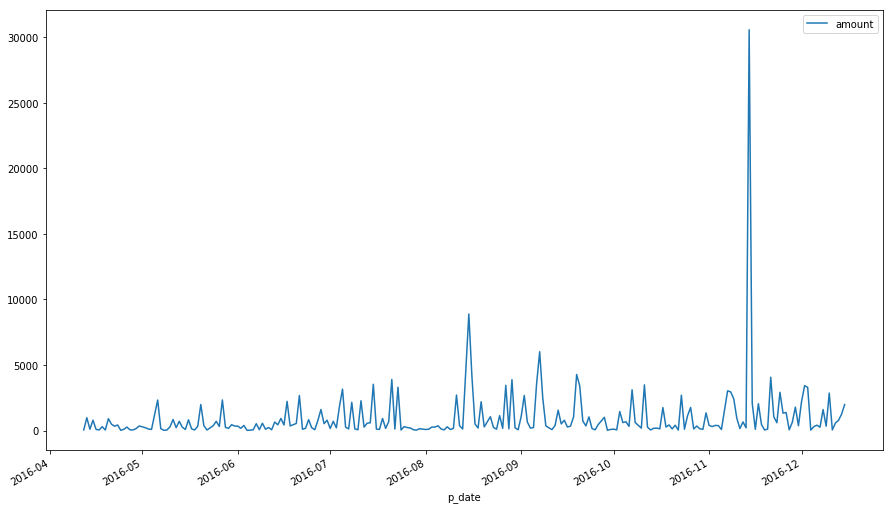

In [23]:
d1=df[df['Lead ID']==318465]
d1.index=d1['p_date']
x=pd.DataFrame(d1[d1['transaction_type']=='debit'].groupby('p_date')['amount'].sum())
x.plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


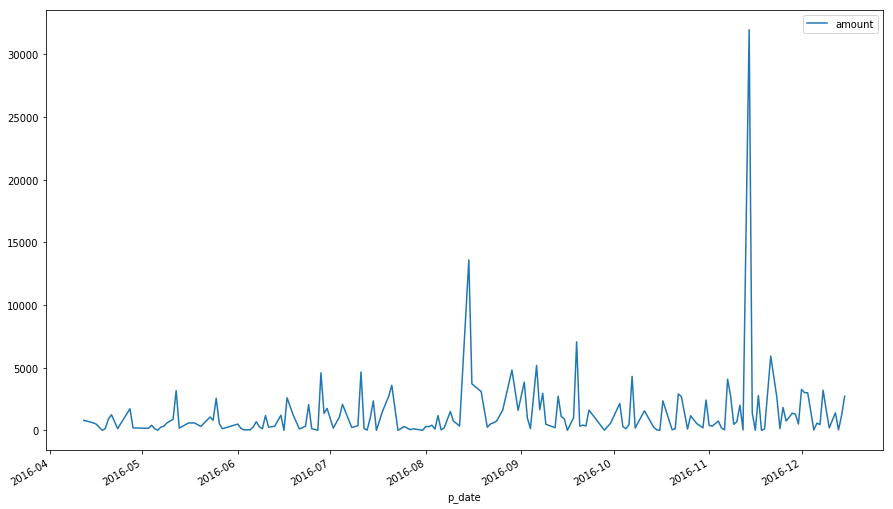

In [24]:
x=pd.DataFrame(d1[d1['transaction_type']=='credit'].groupby('p_date')['amount'].sum())
x.plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


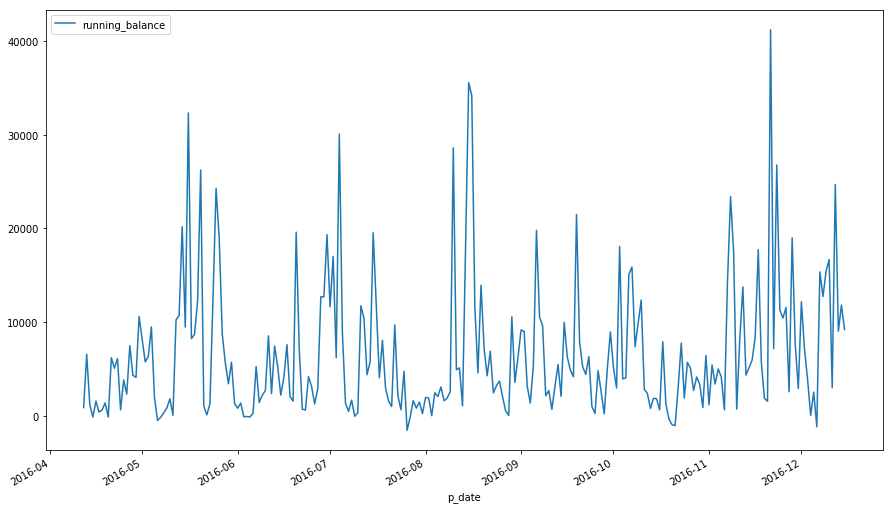

In [25]:
x=pd.DataFrame(d1.groupby('p_date')['running_balance'].sum())
x.plot()

In [26]:
x=d1[d1['transaction_type']=='credit']
x[x['amount']==x['amount'].max()]

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,month,p_date
p_date,,,,,,,,,,,,
2016-11-14,318465,9262,13419,xxxx7330,Health Care and Social Assistance,14-Nov-16,Descriptive Deposit - Proceeds from Loan Accou...,credit,25759.2,1192.29,Nov,2016-11-14


In [27]:
x=d1[d1['transaction_type']=='debit']
x[x['amount']==x['amount'].max()]

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,month,p_date
p_date,,,,,,,,,,,,
2016-11-14,318465,9262,13419,xxxx7330,Health Care and Social Assistance,14-Nov-16,Withdrawal - Cashier's Check,debit,26523.59,-24566.91,Nov,2016-11-14


# Similar Analysis for another merchant

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


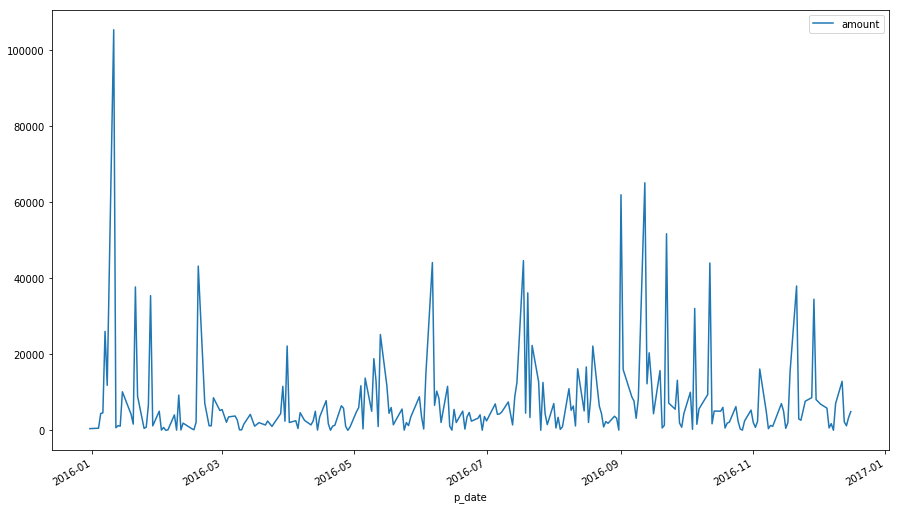

In [28]:
import numpy as np
d1=df[np.logical_and(df['Lead ID']==316728 , df['bank_account_id']==13232)]
d1.index=d1['p_date']
x=pd.DataFrame(d1[d1['transaction_type']=='debit'].groupby('p_date')['amount'].sum())
x.plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


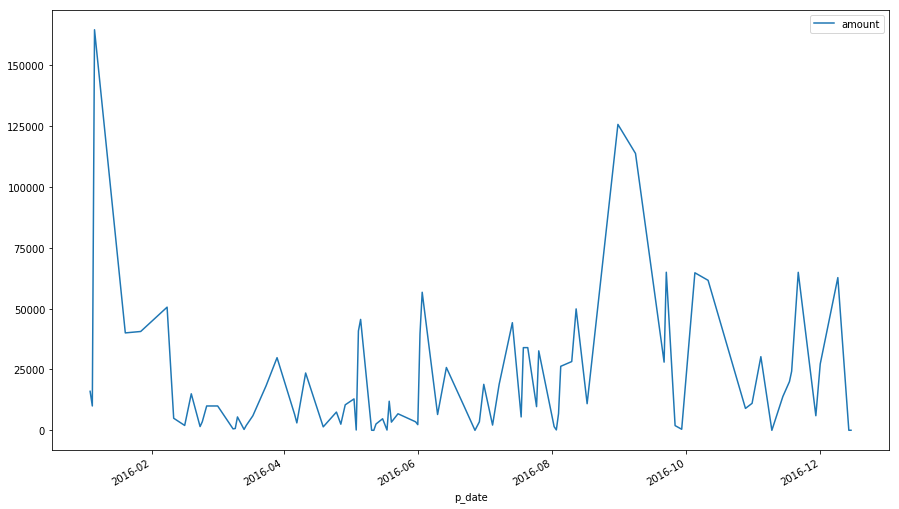

In [29]:
x=pd.DataFrame(d1[d1['transaction_type']=='credit'].groupby('p_date')['amount'].sum())
x.plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


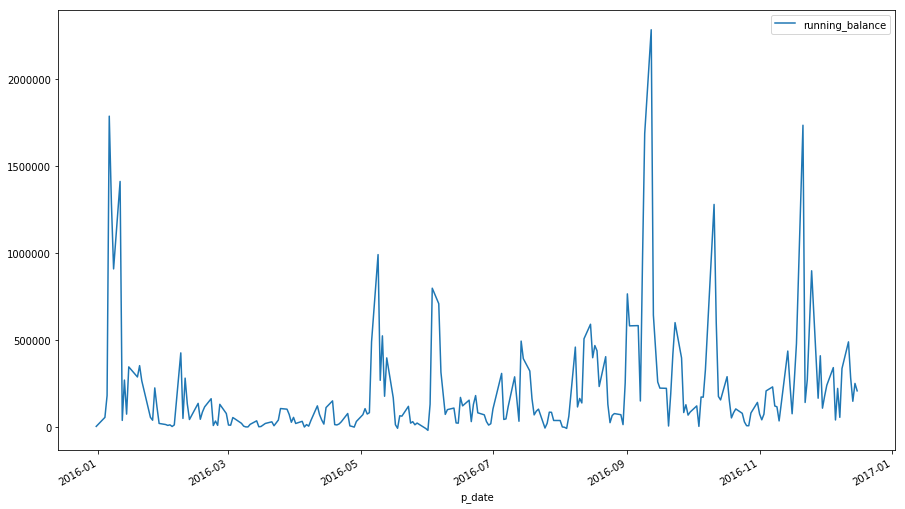

In [30]:
x=pd.DataFrame(d1.groupby('p_date')['running_balance'].sum())
x.plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


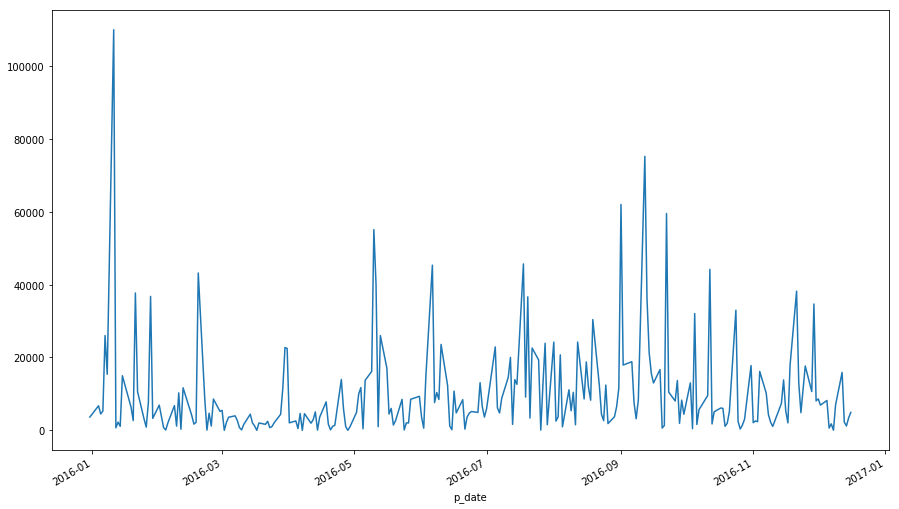

In [31]:
d1=df[df['Lead ID']==316728]
d1.index=d1['p_date']
d1[d1['transaction_type']=='debit'].groupby('p_date')['amount'].sum().plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


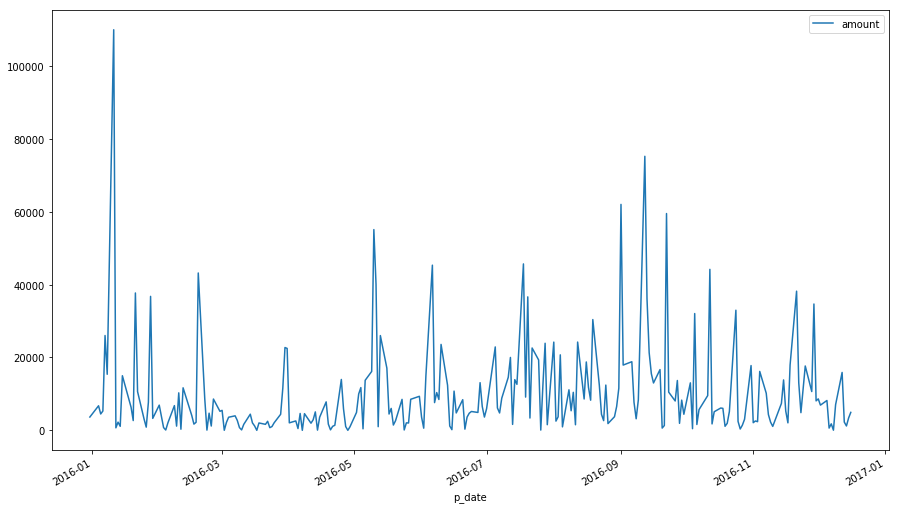

In [32]:
x=pd.DataFrame(d1[d1['transaction_type']=='debit'].groupby('p_date')['amount'].sum())
x.plot()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


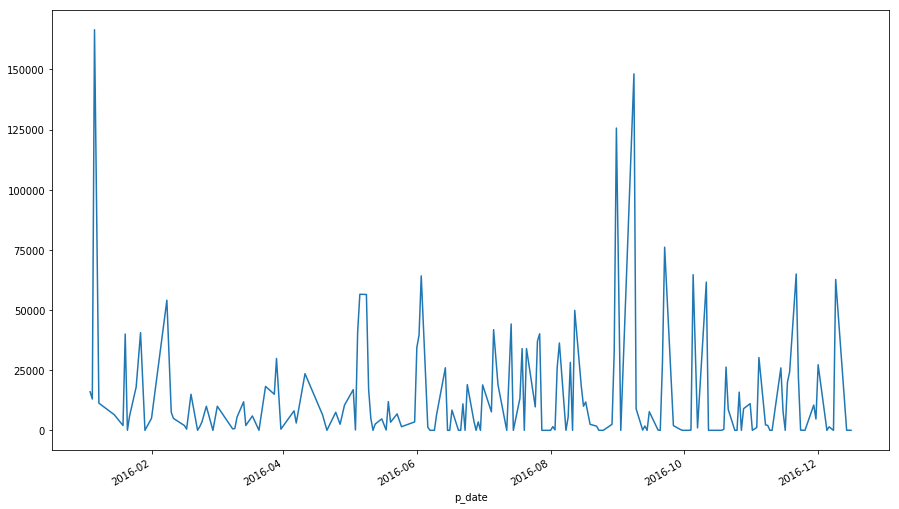

In [33]:
d1=df[df['Lead ID']==316728]
d1.index=d1['p_date']
d1[d1['transaction_type']=='credit'].groupby('p_date')['amount'].sum().plot()


C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'p_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


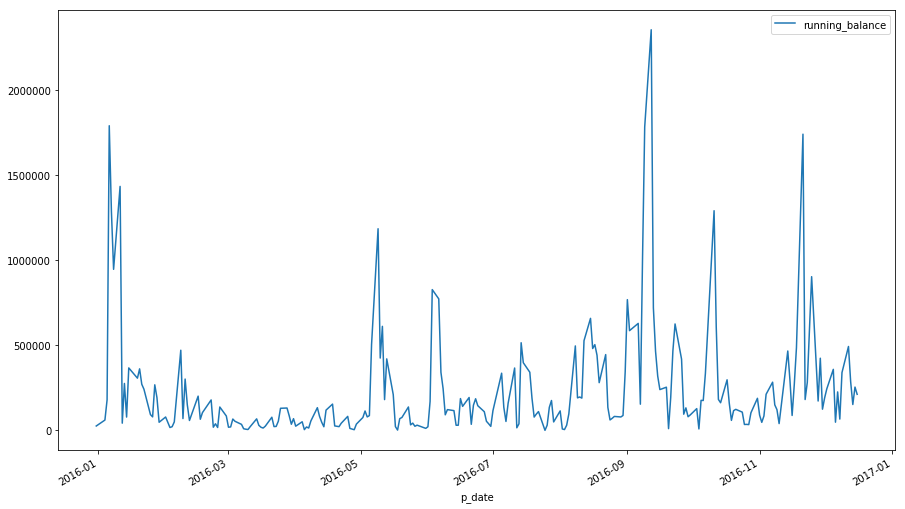

In [34]:
x=pd.DataFrame(d1.groupby('p_date')['running_balance'].sum())
x.plot()

# Analyzing merchant risk

# 1.   top5 deposits/total deposits

In [35]:
#!pip install pandasql
import pandasql as ps
q1 = """SELECT `Lead ID`,sum(amount) as total FROM df where transaction_type like 'credit' group by `Lead ID`"""
y=pd.DataFrame(ps.sqldf(q1, locals()))
y.head()

,Lead ID,total
0,308148,66611.03
1,310443,325133.22
2,312745,719437.89
3,313082,547025.33
4,314036,445920.11


In [36]:
df_deposits=df[df['transaction_type']=="credit"]
df_deposits['rank']=df_deposits.groupby('Lead ID')['amount'].rank(method='first', ascending=False)

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
q1 = """SELECT `Lead ID`,sum(amount) as top5 FROM df_deposits where rank<=5 group by `Lead ID`"""
x=pd.DataFrame(ps.sqldf(q1, locals()))
x.head()

,Lead ID,top5
0,308148,25511.20
1,310443,197248.99
2,312745,107203.75
3,313082,80839.50
4,314036,75536.99


In [38]:
xy=pd.merge(x,y, on=['Lead ID'])

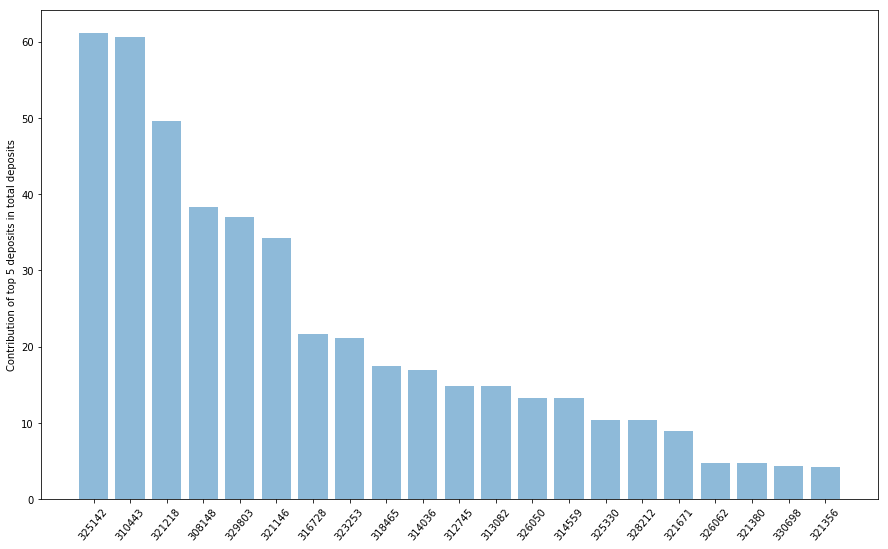

In [39]:
xy['top5 of total']=xy['top5']/xy['total']*100
xy['Lead ID']=xy['Lead ID'].astype('int32')
xy=xy.sort_values(by='top5 of total', ascending=False)
y_pos = np.arange(len(xy['Lead ID']))
plt.bar(y_pos, xy['top5 of total'], align='center', alpha=0.5)
plt.xticks(y_pos, xy['Lead ID'],rotation=50)
plt.ylabel('Contribution of top 5 deposits in total deposits')
plt.show()

# 2.   Average number of days between 2 withdrawals

In [40]:
df_withdraw=df[df['transaction_type']=='debit']

In [41]:
df_withdraw=df_withdraw[['Lead ID','amount','p_date']]
df_withdraw['post_date']=df_withdraw['p_date']
df_withdraw['LID']=df_withdraw['Lead ID']
df_withdraw.set_index(['Lead ID','p_date'], inplace=True)
df_withdraw.sort_index(inplace=True)
df_withdraw['diffs'] = np.nan
df_withdraw['ord']=df_withdraw['post_date'].map(dt.datetime.toordinal)
for idx in df_withdraw.index.levels[0]:
    df_withdraw.diffs[idx] = df_withdraw.ord[idx].diff()

C:\Users\Ankita Bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
xy=pd.DataFrame(df_withdraw.groupby('LID')['diffs'].mean())
xy=xy.sort_values(by='diffs')

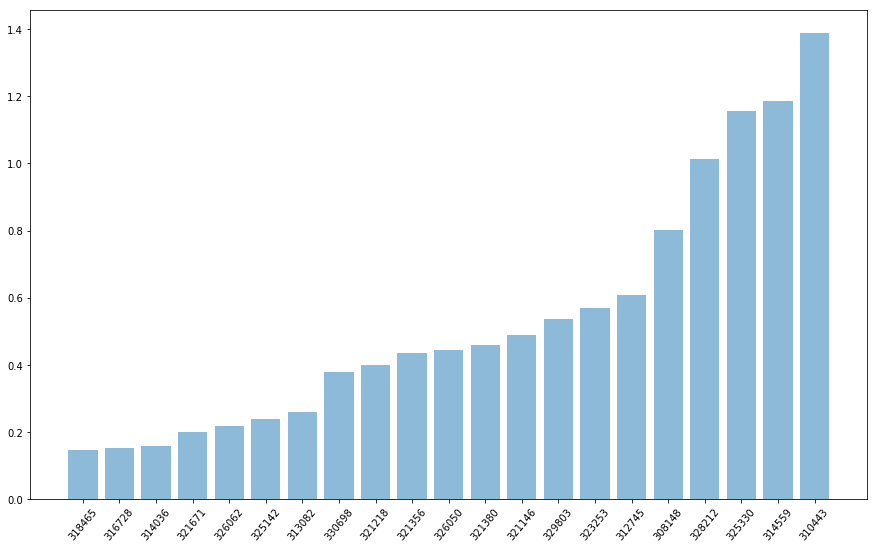

In [43]:
import numpy as np
y_pos = np.arange(len(xy.index))
plt.bar(y_pos, xy['diffs'], align='center', alpha=0.5)
plt.xticks(y_pos, xy.index,rotation=50)
plt.show()

In [44]:
len(xy[xy['diffs']<=1])

17

# Clustering Similar transactions for a merchant

In [45]:
df['credit']=pd.get_dummies(df['transaction_type'],prefix='')['_credit']
df['debit']=pd.get_dummies(df['transaction_type'],prefix='')['_debit']

In [46]:
clus=df[df['Lead ID']==330698]
clus=clus[['p_date','description','credit','debit','amount']]
c=clus.copy()
clus['post_date']=clus['p_date'].map(dt.datetime.toordinal)

In [47]:
from sklearn import preprocessing #Scaling data
min_max_scaler = preprocessing.MinMaxScaler()
clus['amount_scaled']=min_max_scaler.fit_transform(pd.DataFrame(clus['amount']))
clus['post_date']=min_max_scaler.fit_transform(pd.DataFrame(clus['amount']))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vect =CountVectorizer()
X = vect.fit_transform(clus['description']) 
count_vect_df = pd.DataFrame(X.todense(), columns=vect.get_feature_names())
clus.drop(columns=['p_date','description','amount'],inplace=True)
combine=pd.concat([clus.reset_index(), count_vect_df], axis=1)

In [49]:
combine.head()

,index,credit,debit,post_date,amount_scaled,0068,0129,0166,0175,0177,...,xx5806h400,xx5833h100,xx5913f100,xx5936h100,xxx2717,xxx4149,xxx4678,xxx7123,xxx9891,xxxx
0,27777,1,0,0.132128,0.132128,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27778,1,0,0.255300,0.255300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27779,0,1,0.031123,0.031123,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27780,0,1,0.053369,0.053369,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27781,0,1,0.027921,0.027921,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(combine)
clus['cluster']=kmeans.labels_

In [51]:
c['cluster']=clus['cluster']
c[c['cluster']==1].head(15)

,p_date,description,credit,debit,amount,cluster
28028,2016-05-27,ACH deposit BANKCARD BTOT DEP PERSONA DOCTORS-...,1,0,34520.59,1
28029,2016-05-27,ACH Withdrawal NEW LOGIC (877) PREAUTHPMT PERS...,0,1,568.18,1
28030,2016-05-27,Wire transfer withdrawal JANABI ASSOCIATE S IN...,0,1,33952.41,1
28031,2016-05-27,Wire transfer withdrawal MWD Medical P1 L LC ....,0,1,6650.00,1
28032,2016-05-31,ACH deposit BANKCARD BTOT DEP PERSONA DOCTORS-...,1,0,27567.17,1
28033,2016-05-31,ACH deposit BANKCARD BTOT DEP PERSONA DOCTORS-...,1,0,27870.48,1
28034,2016-05-31,ACH deposit BANKCARD BTOT DEP PERSONA DOCTORS-...,1,0,52393.08,1
28035,2016-05-31,ACH Withdrawal CITI CARD ONLINE PAYMENT SHEVAN...,0,1,7531.68,1
28036,2016-05-31,ACH Withdrawal NEW LOGIC (877) PREAUTHPMT PERS...,0,1,568.18,1
28037,2016-05-31,ACH Withdrawal PAYMENT FOR AMZ STORECARD ...61...,0,1,5846.36,1
